## 拉勾网数据分析师岗位分析

### 前言

当前是数据驱动的时代，大数据概念越来越火爆，很多学生开始学习大数据，社会人士也蠢蠢欲动准备转行，对这个新兴职业充满期待。在感性背后，我们来理性看待下目前的数据挖掘岗位需求，如果您确定要进入数据分析行业，您要学习哪些知识。本文主要探索的话题为:
1. 数据分析岗位市场需求量
2. 数据分析岗位诱惑力
3. 数据分析岗位对求职者的学历要求

### 数据来源

    本项目全部数据集来源于拉勾网，由于目前爬虫功力尚有些欠缺，因此暂时借助于集搜客这一网络工具从拉钩网爬取数据挖掘频道下前30页的招聘职位，企业名称，职能要求等相关数据。                                                                     
    之所以选择拉勾网是因为它专注于互联网行业的招聘信息，笔者目前亦准备进入互联网行业，而且岗位信息数据相对完整，极少存在信息的缺漏，极大的减少了数据清理工作。
    本次项目分析主要通过以下几个特征
|描述        |特征           |
|:---------- |:------     |
|岗位名称 |positionName      |
|月薪     |monthSalary|
|公司名称  |companyName   |
|所属行业  |industry    |
|公司规模  |companySize       |
|所属城市  |city        |
|经验要求  |experience  |
|学历要求  |qualification|
|全职/兼职 |full_or_part|
|岗位标签|positionLables|
|职位优势|positionAdvantage|

### 导入数据

In [33]:
# coding:utf-8
from pandas import DataFrame,Series
import pandas as pd
import numpy as np

In [34]:
#导入数据
df = pd.read_csv('C:/Users/79839/jupyter_text/DataAnalyst.csv',encoding = 'gb2312')

In [35]:
#查看数据表
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


### 数据完整性查看

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB


### 数据整理

In [37]:
len(df.positionId.unique())#查看职位的重复情况

5031

In [38]:
df_duplicates = df.drop_duplicates(subset = 'positionId',keep='first')#去除重复数据
df_duplicates.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [39]:
df_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5031 entries, 0 to 6766
Data columns (total 17 columns):
city                 5031 non-null object
companyFullName      5031 non-null object
companyId            5031 non-null int64
companyLabelList     4529 non-null object
companyShortName     5031 non-null object
companySize          5031 non-null object
businessZones        3535 non-null object
firstType            5027 non-null object
secondType           5028 non-null object
education            5031 non-null object
industryField        5031 non-null object
positionId           5031 non-null int64
positionAdvantage    5031 non-null object
positionName         5031 non-null object
positionLables       5007 non-null object
salary               5031 non-null object
workYear             5031 non-null object
dtypes: int64(2), object(15)
memory usage: 707.5+ KB


经过初步的清理清楚重复行和删除无用标签后，可以看到数据有效关键信息剩余14个，数据记录612条，数据相对保存完整，数据类型为object和datetime64[ns]，可以看到companySize数据缺失值较多。不过其他数据保存完整，后续分析会方便很多。

### 薪资下限数据格式统一

In [40]:
def cut_word(word): #自定义函数
    position = word.find('_') #查找‘_’符号所在的位置
    if position != -1 :#去除脏数据 ('K以上')
        bottomSalary = word[:position-1]
    else:
        bottomSalary = word[:word.upper().find('K')]
    return bottomSalary #截取薪资范围开头至K之间的数字

In [41]:
df_duplicates['bottomSalary'] = df_duplicates.salary.apply(cut_word) #apply将cut_word函数应用在salary列的所有行

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [42]:
df_duplicates.bottomSalary.astype('int').head() #将‘bottomSalary’转换为数字

0     7
1    10
2     4
3     6
4     2
Name: bottomSalary, dtype: int32


### 薪资上限数据格式统一

In [43]:
#薪资上限范围截取
def cut_word(word,method):
    position = word.find('_')
    length = len(word)
    if position !=-1:
        bottomSalray = word[:position-1]
        topSalray = word[position+1:length-1]
    else:
        bottomSalary = word[:word.upper().find('K')]
        topSalary = bottomSalary
    if method == 'bottom' :
        return bottomSalary
    else:
        return topSalary
    #return bottomSalary,topSalary

In [44]:
df_duplicates['topSalary'] = df_duplicates.salary.apply(cut_word,method = 'top')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### 数据类型转换

In [45]:
education_count = df_duplicates[['education','positionName']].groupby(['education'],as_index=False).count()
education_count.head()

,education,positionName
0,不限,287
1,博士,6
2,大专,615
3,本科,3835
4,硕士,288


### 计算平均薪资

In [46]:
#数据类型转换
df_duplicates.topSalary = df_duplicates.topSalary.astype('int')
df_duplicates.bottomSalary = df_duplicates.bottomSalary.astype('int')

df_duplicates['avgSalary'] = df_duplicates.apply(lambda x:(x.bottomSalary+x.topSalary)/2,axis=1)

D:\anaconda\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


### 数数据描述

In [81]:
#选取字段标签
df_clean = df_duplicates[['city','companyShortName','companySize','education',
                          'industryField','positionName','positionLables','positionAdvantage',
                          'workYear','avgSalary']]

In [60]:
df_clean.city.value_counts() #value_counts() 统计所有非零元素的个数

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

In [61]:
df_clean.describe()

,avgSalary
count,5031.000000
mean,12.567084
std,6.715625
min,1.000000
25%,8.000000
50%,11.000000
75%,15.000000
max,60.000000


可以看出数据分析师的薪资平均为12.5K，中位数是11K，两者相差不大，最大薪资为60K，应该是数据科学家或者数据分析总监档位的水平，大部分数据分析师的薪资在7K-12.5K之间。

### 整体薪资情况

Text(0.5,1,'不同薪资情况下的招聘人数')

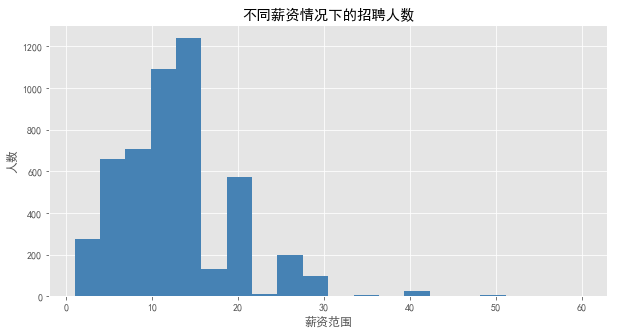

In [62]:
#对薪资数据进行可视化展示
from pylab import mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体,win使用SimHei
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
plt.style.use('ggplot') #使用R语言中的‘ggplot2’配色
df_clean.avgSalary.hist(bins=20,facecolor='steelblue',alpha=1.0,figsize=(10,5))
plt.xlabel('薪资范围')
plt.ylabel('人数')
plt.title('不同薪资情况下的招聘人数')

从图中可以看出：该岗位薪资大部分集中于5K到25K之间，不过也有少数人能拿到45K的高薪，也就应了一句话，你的能力决定你的薪资水平，能力越强，薪资自然就越高，只要技术过硬，就有机会获得高薪。数据分布呈双峰状，因为原始数据来源于拉勾网的爬取，薪资很容易集中在某个区间，跟真实薪资可能会有所出入，不过误差不大。

### 不同城市薪资分布状况

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


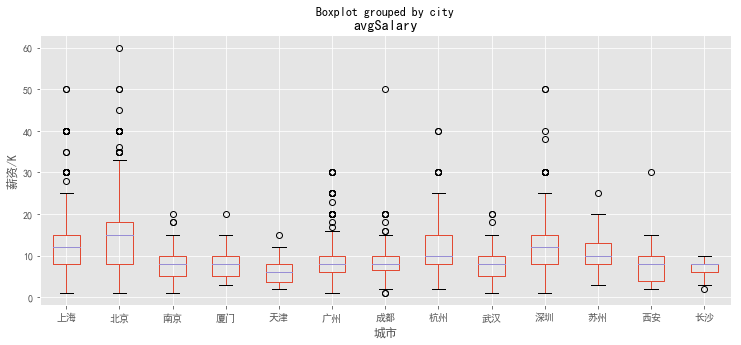

In [63]:
from pylab import mpl
from matplotlib.font_manager import FontProperties
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体,win使用SimHei
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

ax = df_clean.boxplot(column = 'avgSalary',by = 'city',figsize = (12,5))
plt.xlabel('城市')
plt.ylabel('薪资/K')
plt.show()


从上图可以看：薪资范围主要集中在5K到30K之间，和前面的整体薪酬范围是吻合的，平均薪酬的前五名分别为上海、北京、杭州、深圳、厦门，上海以平均薪资约16K排在首位，不愧被称之为魔都。

在高薪方面，北京总是能给人惊喜，前面分析到整体薪资最高为45K，而这个岗位就在北京，看来北京果然是各个行业大牛的聚集地啊，不过从图中也可以看出，北京有大量工作汇集在了6K到13K之间，说明想要高薪脱离这个群体还要继续努力啊。

### 学历对薪资的影响情况

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'薪资/K')

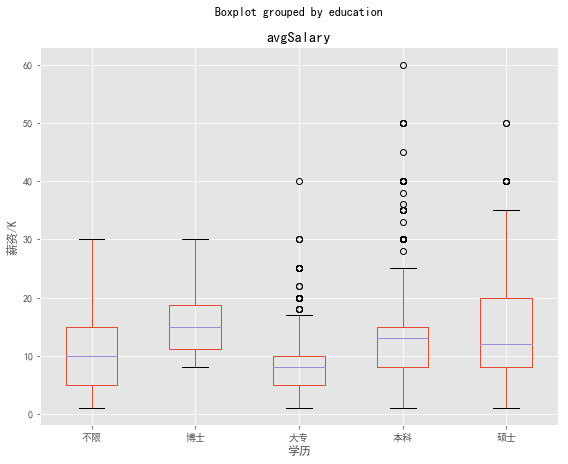

In [64]:
ax = df_clean.boxplot(column = 'avgSalary',by = 'education',figsize=(9,7))
plt.xlabel('学历')
plt.ylabel('薪资/K')

从上图可以看出：

一、博士的平均薪资高于其他学历的平均薪资，但是博士的最高薪资却低于硕士的最高薪资，这有点出人意料，出现这种结果的原因有两个
1. 数据分析岗位对博士学历的需求不是很多，竞争较小，所以最高薪资较硕士最高薪资低。
2. 本次数据中博士岗位的数据较少，分析结果存在误差。

二、本科学历最高薪资虽然比硕士学历的最高工资低，但是本科学历的平均薪资比硕士学历的平均薪资高，这可能与IT行业本身，本科生已足矣胜任，硕士学历优势不够明显，另外可能是因为样本有限，工作年限等水平不一致而造成分析误差。

### 工作经验对薪资的影响情况

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0,0.5,'薪资/K')

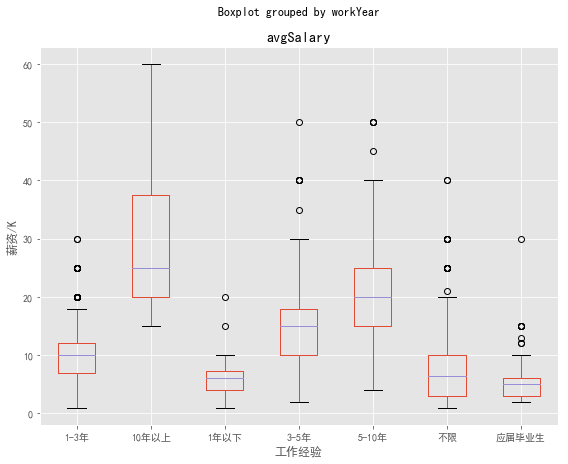

In [65]:
df_clean.sort_values('workYear')
ax = df_clean.boxplot(column = 'avgSalary',by='workYear',figsize=(9,7))
plt.xlabel('工作经验')
plt.ylabel('薪资/K')

从上图可以看出：薪资随着工作经验的增加几乎是成倍的增长，工作三五年就差不多可以达到20K水平，并且短期内并不会随着年龄的增长而导致薪资下降，如果能在这个行业坚持下来，未来的薪资待遇不会让人失望的。

### 北京和上海数据分析师岗位招聘中学历对薪资的影响情况

D:\anaconda\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


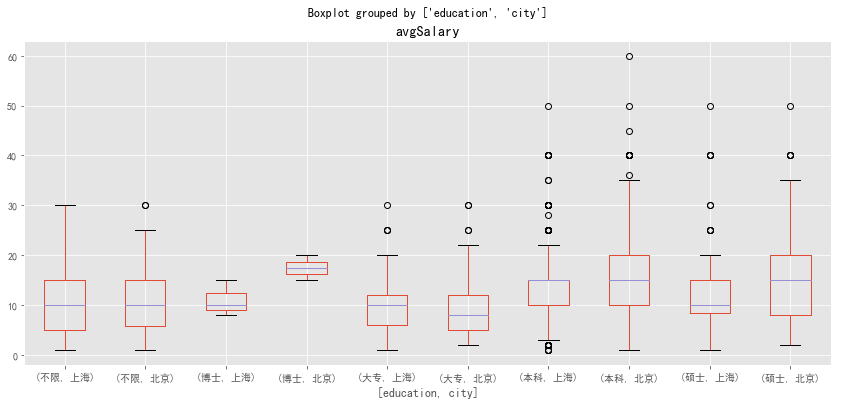

In [66]:
df_sh_bj = df_clean[df_clean['city'].isin(['上海','北京'])]
ax=df_sh_bj.boxplot(column = 'avgSalary',by = ['education','city'],figsize=(14,6))

从上图可以看出：在不同的学历背景下，北京的薪资都是稍优于上海的，北京的公司更愿意用高薪资吸引数据分析师。

In [67]:
df_clean.groupby(['city','education']).avgSalary.count().unstack()

education,不限,博士,大专,本科,硕士
city,,,,,
上海,68.0,3.0,110.0,723.0,75.0
北京,124.0,2.0,190.0,1877.0,154.0
南京,5.0,NaN,11.0,61.0,6.0
厦门,3.0,NaN,7.0,18.0,2.0
天津,1.0,NaN,4.0,15.0,NaN
广州,12.0,NaN,84.0,232.0,7.0
成都,8.0,NaN,26.0,99.0,2.0
杭州,26.0,NaN,58.0,303.0,19.0
武汉,10.0,NaN,14.0,44.0,1.0


从上表可以看出要求博士学位的职位只有六个，每个公司给出的薪资都存在差别并且博士的在职薪资与公司的招聘薪资存在一定的差距。所以这就是上面图表出现异常的原因。

### 查看不同城市各职位招聘数前五的职位

In [68]:
def topN(df,n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending = False)[:n]

In [69]:
df_clean.groupby('city').positionName.apply(topN).head()

city          
上海    数据分析师       79
      大数据开发工程师    37
      数据产品经理      31
      大数据工程师      26
      需求分析师       20
Name: positionName, dtype: int64

从上表可以看出：虽说是数据分析师岗位，其实有不少的开发工程师，数据产品经理等。这是抓取下来数据的缺失点，他反应出的不是数据分析师，而是数据领域。不同城市的需求是不一样的，北京的数据产品经理看书去要比上海的高。

### 数据分析师岗位福利关键词

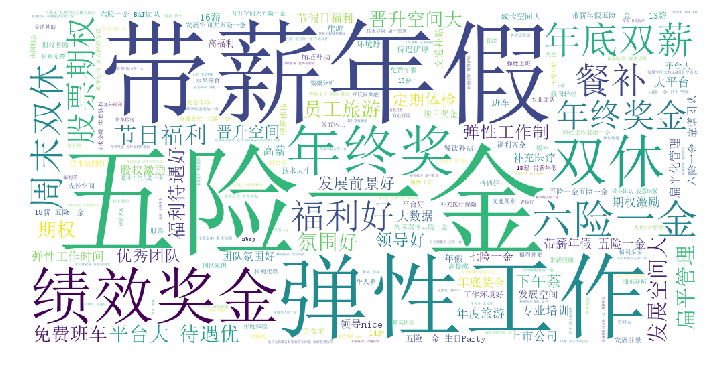

In [73]:
from matplotlib import font_manager as fm
from matplotlib import cm
from os import path
import random
from wordcloud import WordCloud, ImageColorGenerator
#创建一个文本，将关键词列表全部写入该文本
def advantage_text(word_list):
    f = open('advantage_text.txt','ab+')
    for word in word_list:
        f.write((word).encode('UTF-8'))
    f.close()
df_clean['positionAdvantage'].apply(advantage_text)

#指定默认字体
font_path='C:\\WINDOWS\\Fonts\\simsun.ttc'

#设置要分析的文本路径
d = path.dirname('.')
text_path = 'advantage_text.txt' 
text1 = open(path.join(d, text_path),'r', encoding='UTF-8').read()

# 设置词云属性
wc = WordCloud(font_path=font_path,width = 1000,height = 500,background_color = 'white',margin=2)

# 生成词云, 可以用generate输入全部文本
wc.generate(text1)
fig = plt.figure(figsize=(12,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

从数据分析人才需求的公司给出的福利来看，数据分析师岗位福利待遇还是相当不错的，***多数数据分析岗都有带薪年假、弹性工作、旅游体检、五险一金等基本保障，另外技术氛围、大牛团队、优质项目、发展空间大等能够满足大部分数据分析从业者工作环境需求***。

### 结论

通过对所收集的拉勾网招聘数据的分析，我们得到下面的几个结论：
1. 对于数据分析师这一岗位，有大量的工作机会集中在北上广深以及杭州。
2. 数据分析师岗位平均薪资约为15K，大部分薪资集中于5K到25K之间，不过也有少部分获得更高的薪资，令人充满期待。
3. 平均薪资来看，上海以平均薪资16K排在首位，其次分别为北京、杭州。从高薪方面来看，北京高薪岗位相对较多，发展上限也更高。
4. 企业对工作经验需求大多数集中在1-5年，对于1年以下工作经验的‘小白’需求量较少。
5. 薪资随着工作经验的增加几乎是成倍的增长，工作三五年就差不多可以达到20K水平，并且短期内并不会随着年龄的增长而导致薪资下降。
6. 本科学历对于数据分析这一岗位算是个门槛，专科学历及以下需求量极少，找到合适的工作会相对比较艰难。
7. 本科平均薪资为15K左右，大专9K左右，薪资方面差异明显。并且仅从薪资来看，短期来说三年的研究生经历可能并没有三年行业经验来的有价值。
8. 多数数据分析岗都有带薪年假、旅游体检、五险一金等基本保障，另外技术氛围、大牛团队、优质项目、弹性工作等能够满足大部分数据分析从业者工作环境需求。
9. 数据分析岗技能需求频率排在前列的有：SQL，Excel，Python，Hive，SPSS，SAS，Mysql，Hadoop，Tableau，BI，Oracle，其中SQL、Excel和Python可以说是必备技能。